<a href="https://colab.research.google.com/github/lokesh-232/MachineLearningPractice/blob/main/Classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
akram24_social_network_ads_path = kagglehub.dataset_download('akram24/social-network-ads')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [ ]:
df=df.drop('User ID',axis=1)

In [ ]:
X=df.iloc[0:,:-1]
y=df.iloc[0:,-1]
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
X_cols=X.columns
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [ ]:
X=pd.DataFrame(X,columns=X_cols)
X

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751
...,...,...,...
395,-0.980196,0.797057,-0.844019
396,1.020204,1.274623,-1.372587
397,-0.980196,1.179110,-1.460681
398,1.020204,-0.158074,-1.078938


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,Gender,Age,EstimatedSalary
3,-0.980196,-1.017692,-0.374182
18,1.020204,0.797057,-1.225763
202,-0.980196,0.128465,1.886912
250,-0.980196,0.606031,-0.902749
274,-0.980196,1.847701,-1.284492
...,...,...,...
71,-0.980196,-1.304232,-1.255127
106,-0.980196,-1.113206,-1.020209
270,-0.980196,0.510518,1.857547
348,1.020204,0.128465,0.213115


In [ ]:
from sklearn.linear_model import LogisticRegression
log_cls=LogisticRegression()
log_cls.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_predict=log_cls.predict(X_test)
y_predict

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cf=confusion_matrix(y_test,y_predict)
cf

array([[50,  2],
       [ 7, 21]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_cls=DecisionTreeClassifier(criterion='entropy')
dec_cls.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_predict=dec_cls.predict(X_test)
y_predict

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
cf=confusion_matrix(y_test,y_predict)
cf

array([[46,  6],
       [ 7, 21]])

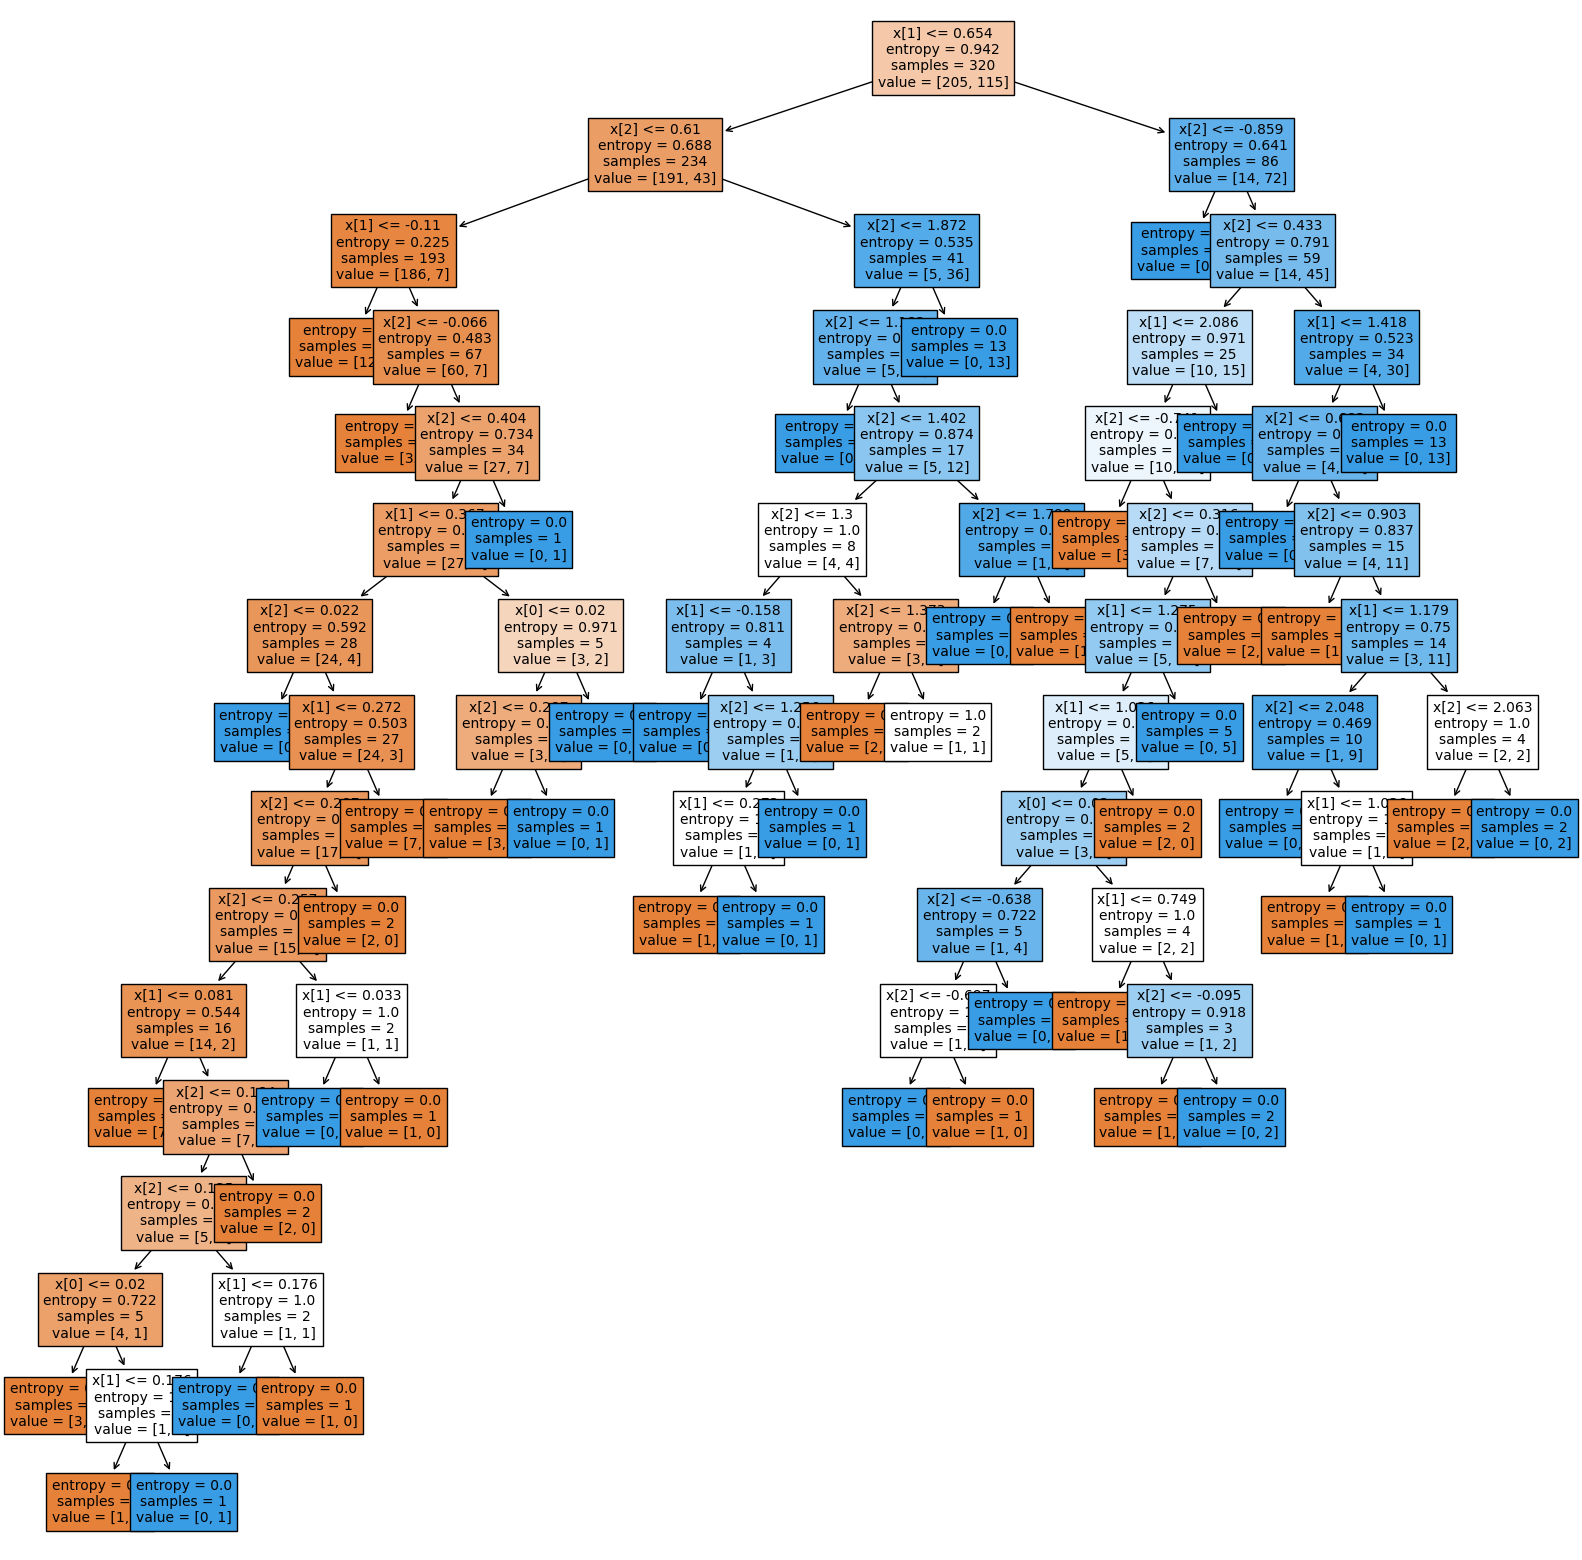

In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(dec_cls,filled=True,fontsize=10)

plt.show()

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_cls=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn_cls.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_predict=knn_cls.predict(X_test)

In [ ]:
y_predict

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
np.array(y_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
confusion_matrix(y_test,y_predict)

array([[48,  4],
       [ 2, 26]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [ ]:
c_predict=[]
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):

    knn_cls=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn_cls.fit(X_train,y_train)
    print('no of neighbours = ',i)
    cm=confusion_matrix(y_test,knn_cls.predict(X_test))
    print(cm)
    print(classification_report(y_test,knn_cls.predict(X_test)))
    correct_predictions = cm[0, 0] + cm[1, 1]
    print(f"{correct_predictions} are correctly predicted out of {len(y_test)}")
    c_predict.append(correct_predictions)

no of neighbours =  1
[[50  2]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

71 are correctly predicted out of 80
no of neighbours =  2
[[51  1]
 [12 16]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        52
           1       0.94      0.57      0.71        28

    accuracy                           0.84        80
   macro avg       0.88      0.78      0.80        80
weighted avg       0.86      0.84      0.83        80

67 are correctly predicted out of 80
no of neighbours =  3
[[49  3]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.89      0.86      0

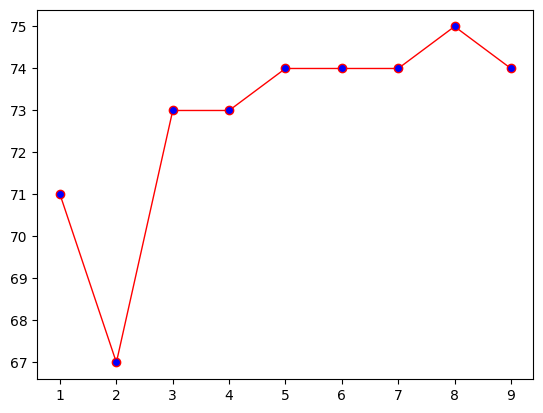

In [ ]:
plt.plot(range(1,10),c_predict,marker='o',c='red',linewidth=1,markerfacecolor='blue')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 10),  # Test neighbors from 1 to 9
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Test different distance metrics
}

# Initialize the KNeighborsClassifier
knn_cls = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=knn_cls,
    param_grid=param_grid,
    scoring='accuracy',  # You can use other scoring metrics if preferred
    cv=5,                # 5-fold cross-validation
    verbose=1            # Show progress
)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7}
Best Cross-Validation Score: 0.9125

Confusion Matrix:
[[48  4]
 [ 2 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [ ]:

    print("Manually refitting the model with n_neighbors=8.")
    knn_cls = KNeighborsClassifier(n_neighbors=8, metric=best_params['metric'])
    knn_cls.fit(X_train, y_train)

    # Test the model on the test set
    y_pred = knn_cls.predict(X_test)
    print("\nConfusion Matrix for n_neighbors=8:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report for n_neighbors=8:")
    print(classification_report(y_test, y_pred))


Manually refitting the model with n_neighbors=8.

Confusion Matrix for n_neighbors=8:
[[49  3]
 [ 2 26]]

Classification Report for n_neighbors=8:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 20),  # Test neighbors from 1 to 9
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Test different distance metrics
}

# List of test sizes to evaluate
test_sizes = [0.2, 0.3, 0.4]  # 20%, 30%, and 40% for test sets

# Store results for each test size
results = {}

for test_size in test_sizes:
    print(f"\nEvaluating with test_size={test_size}...\n")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize GridSearchCV
    knn_cls = KNeighborsClassifier()
    grid_search = GridSearchCV(
        estimator=knn_cls,
        param_grid=param_grid,
        scoring='accuracy',  # You can change this to another scoring metric if needed
        cv=5,  # 5-fold cross-validation
        verbose=1
    )

    # Fit the Grid Search
    grid_search.fit(X_train, y_train)

    # Get the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best Parameters for test_size={test_size}: {best_params}")
    print(f"Best Cross-Validation Score: {best_score:.3f}")

    # Evaluate on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Store results
    results[test_size] = {
        'Best Parameters': best_params,
        'Best CV Score': best_score,
        'Test Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Test Classification Report': classification_report(y_test, y_pred, output_dict=True)
    }

    # Print Test Results
    print("\nConfusion Matrix on Test Data:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report on Test Data:")
    print(classification_report(y_test, y_pred))

# Optionally: Analyze all results
import pandas as pd
summary = pd.DataFrame.from_dict({
    test_size: {
        'Best Parameters': results[test_size]['Best Parameters'],
        'Best CV Score': results[test_size]['Best CV Score']
    } for test_size in results
}, orient='index')
print("\nSummary of Results:")
print(summary)



Evaluating with test_size=0.2...

Fitting 5 folds for each of 57 candidates, totalling 285 fits
Best Parameters for test_size=0.2: {'metric': 'euclidean', 'n_neighbors': 7}
Best Cross-Validation Score: 0.912

Confusion Matrix on Test Data:
[[48  4]
 [ 2 26]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80


Evaluating with test_size=0.3...

Fitting 5 folds for each of 57 candidates, totalling 285 fits
Best Parameters for test_size=0.3: {'metric': 'euclidean', 'n_neighbors': 7}
Best Cross-Validation Score: 0.911

Confusion Matrix on Test Data:
[[68  5]
 [ 4 43]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.94 

In [ ]:
summary